<a href="https://www.kaggle.com/code/talibsid/bias-variance-tradeoff?scriptVersionId=131733784" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import tabulate
import matplotlib.pyplot as plt
from matplotlib import animation
import pickle, random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# **Loading data**

In [2]:
with open('/kaggle/input/aaaaaaaa/train_dataset.pickle', 'rb') as f:
    data = pickle.Unpickler(f).load()

with open('/kaggle/input/aaaaaaaa/test_dataset.pickle', 'rb') as g:
    test = pickle.Unpickler(g).load()

In [3]:
random.shuffle(data)

# **Sampling Data**

### **Training Data**

In [4]:
xi_train, yi_train = np.split(data, 2, axis=1)
xi_train = np.array_split(xi_train, 20)
yi_train = np.array_split(yi_train, 20)

### **Testing Data**

In [5]:
xi_test, yi_test = test[:,0], test[:,1]
xi_test = xi_test.reshape(-1, 1)
# print(xi_test)

# **Polynomial Regression**

### **Training and Testing Data**

In [6]:
xi_vec_train = { "degree " + str(i): [PolynomialFeatures(i).fit_transform(x.reshape(-1, 1)) for x in np.array_split(np.concatenate(xi_train), 20)] for i in range(1, 16) }
xi_vec_test = { "degree " + str(i): PolynomialFeatures(i).fit_transform(np.concatenate(xi_test).reshape(-1, 1)) for i in range(1, 16) }

# **Training the Model**

In [7]:
Models = { "degree " + str(i): [LinearRegression().fit(xi_vec_train["degree " + str(i)][j], yi_train[j]) for j in range(20)] for i in range(1, 16) }

# **Prediction**

In [8]:
f_hat_x = { "degree " + str(i): np.array([Models["degree " + str(i)][j].predict(xi_vec_test["degree " + str(i)]) for j in range(20)]) for i in range(1, 16) }

# **Plotting Prediction and Calculating Variance**

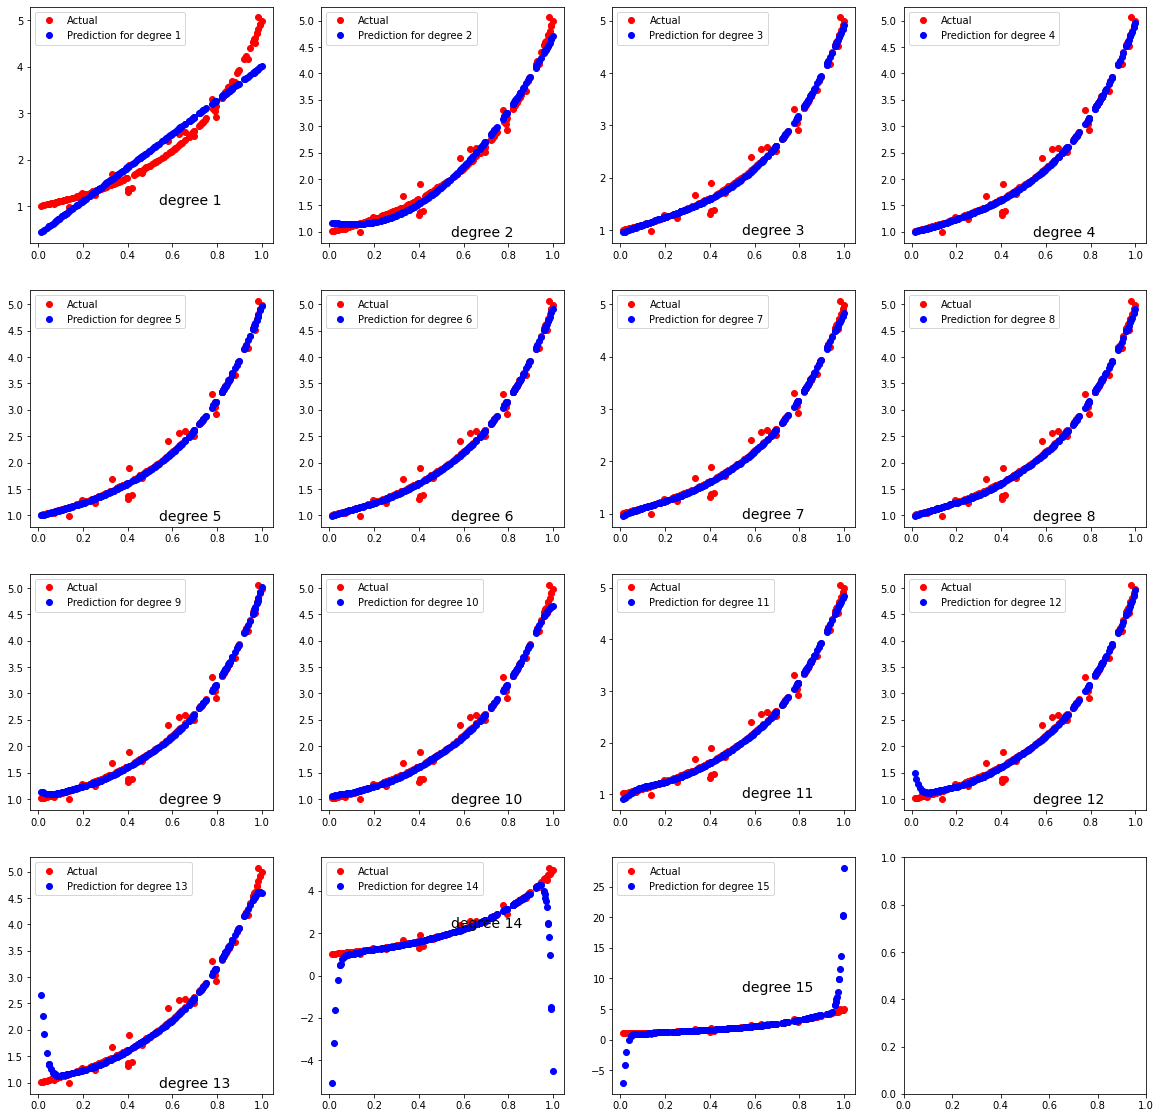

In [9]:
variance = np.zeros(15)
avg_f_hat_x = {}

for idx, degree in enumerate(f_hat_x):
    data = np.array(f_hat_x[degree])
    variance[idx] = np.mean(np.var(data, axis=0))
    avg_f_hat_x[degree] = np.mean(data, axis=0)

fig, axs = plt.subplots(4, 4, figsize=(20,20))
axs = axs.flatten()

for i, degree in enumerate(avg_f_hat_x):
    axs[i].plot(xi_test, yi_test, "o", color="red", label="Actual")
    axs[i].plot(xi_test, avg_f_hat_x[degree], "o", color="blue", label="Prediction for " + degree)
    
    axs[i].legend()

    axs[i].text((axs[i].get_xlim()[1] - axs[i].get_xlim()[0]) / 2, 
            (axs[i].get_ylim()[1] - axs[i].get_ylim()[0]) / 4, 
            degree, 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=14)
plt.savefig("allpreds.jpg")
plt.show()

## **Bias**

In [10]:
Bias_2 = np.zeros(15)
Bias = np.zeros(15)

for idx, degree in enumerate(f_hat_x):
    data = np.array(f_hat_x[degree])
    Bias[idx] = np.mean(abs(np.mean(data, axis = 0) - yi_test))
    Bias_2[idx] = np.mean((np.mean(data, axis = 0) - yi_test) ** 2)
    
# print(Bias)
# plt.plot(Bias,color="blue",label="Bias^{2}")
# plt.plot(Bias_2,color="red",label="Bias")
# plt.yticks(range(0,4))
# plt.legend()
# plt.show()


# plt.plot(Bias,color="red",label="Bias^{2}")
# plt.plot(variance,color="blue",label="Variance")
# # plt.yticks(range(0,4))
# plt.legend()
# plt.show()

## **Tabulating Bias and Variance**

In [11]:
table = pd.DataFrame({
    "degree": range(1, 16),
    "bias": Bias,
    "bias_2": Bias_2,
    "variance": variance
})
print(table)

    degree      bias     bias_2   variance
0        1  1.217188   2.285152   0.007424
1        2  1.191771   2.386655   0.001631
2        3  1.189047   2.391735   0.000665
3        4  1.189772   2.394886   0.000816
4        5  1.189681   2.395198   0.001045
5        6  1.187598   2.384769   0.004356
6        7  1.185877   2.372756   0.008253
7        8  1.186225   2.378409   0.008721
8        9  1.185582   2.386049   0.011563
9       10  1.177324   2.339458   0.028897
10      11  1.185704   2.374861   0.021624
11      12  1.178845   2.359961   0.131519
12      13  1.168826   2.303662   0.882509
13      14  1.254166   2.954535  15.693803
14      15  1.760331  11.651376  82.932426



## **Irreducible Error**

-1.7763568394002505e-15
[ 0.00000000e+00 -4.44089210e-16 -4.44089210e-16  0.00000000e+00
  4.44089210e-16  4.44089210e-16 -8.88178420e-16  0.00000000e+00
  0.00000000e+00  8.88178420e-16 -4.44089210e-16  4.44089210e-16
  4.44089210e-16 -1.77635684e-15  3.55271368e-15]


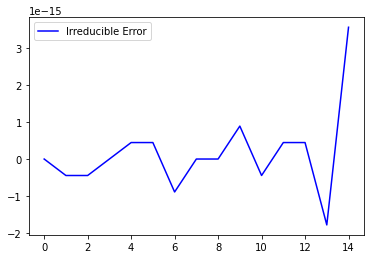

    degree  Irreducible Error
0        1       0.000000e+00
1        2      -4.440892e-16
2        3      -4.440892e-16
3        4       0.000000e+00
4        5       4.440892e-16
5        6       4.440892e-16
6        7      -8.881784e-16
7        8       0.000000e+00
8        9       0.000000e+00
9       10       8.881784e-16
10      11      -4.440892e-16
11      12       4.440892e-16
12      13       4.440892e-16
13      14      -1.776357e-15
14      15       3.552714e-15


<Figure size 432x288 with 0 Axes>

In [12]:
mse = np.zeros(15)
for idx, degree in enumerate(f_hat_x):
    data = np.array(f_hat_x[degree])
    for i in data:
        mse[idx] += np.mean(np.square(i - yi_test))
mse /= 20

ierr = mse -  variance - Bias_2
print(min(ierr))
print(ierr)


plt.plot(ierr,color="blue",label="Irreducible Error")
plt.legend()
plt.show()
plt.savefig("ierr.jpg")

table_ierr = pd.DataFrame({
    "degree": range(1, 16),
    "Irreducible Error": ierr
})
print(table_ierr)

## **Bias$^{2}$ - Variance Graph**

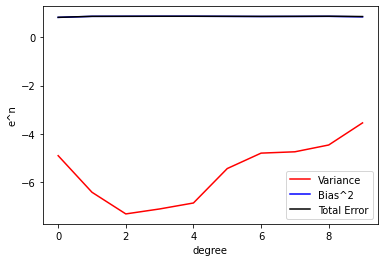

In [13]:
n = 10
plt.plot(np.log(variance[:n]), color="red", label="Variance")
plt.plot(np.log(Bias_2[:n]), color="blue", label="Bias^2")
plt.plot(np.log(mse[:n]), color="black", label="Total Error")
plt.legend()
plt.ylabel("e^n")
plt.xlabel("degree")
plt.savefig("biasvariance15_log.jpg")
plt.show()

In [14]:
data = [-4.44089210e-16, -8.88178420e-16, 4.44089210e-16, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.44089210e-16, -4.44089210e-16,
        0.00000000e+00, -4.44089210e-16, 0.00000000e+00, 8.88178420e-16,
        4.44089210e-16, 4.44089210e-15, 1.55431223e-14]

df = pd.DataFrame({
    'degree': range(1,16),
    'Irreducible Error': data
})

print(df)

    degree  Irreducible Error
0        1      -4.440892e-16
1        2      -8.881784e-16
2        3       4.440892e-16
3        4       0.000000e+00
4        5       0.000000e+00
5        6       0.000000e+00
6        7       4.440892e-16
7        8      -4.440892e-16
8        9       0.000000e+00
9       10      -4.440892e-16
10      11       0.000000e+00
11      12       8.881784e-16
12      13       4.440892e-16
13      14       4.440892e-15
14      15       1.554312e-14


In [15]:
def max_total_with_k_elements(A, k):
    max_val = max(A)  # Find the maximum element in the array
    total = 0  # Variable to store the maximum total

    q, r = divmod(k, max_val + 1)  # Calculate quotient and remainder
    
    total += q * (max_val + 1)  # Add contribution of complete cycles
    
    A.sort()  # Sort the array in non-decreasing order
    
    for i in range(r):
        total += A[i]  # Add current element to the total
    
    return total

# Example usage:
array = [2,3,10,0]
k = 2
max_total = max_total_with_k_elements(array, k)
print("Maximum total:", max_total)


Maximum total: 2
